In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#라이브러리 다운

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# for coloring maps
from matplotlib import colormaps

# for data visualizations

import plotly.express as px

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for data split
from sklearn.model_selection import train_test_split

In [ ]:
df_start=pd.read_csv('/content/drive/MyDrive/캡디/최종 보고서용 모델 코드/융합캡스톤디자인_최종데이터.csv')

In [ ]:
df_start

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,156.0,70.0,28.76,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,152.0,61.0,26.40,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,18.0,63.0,99.0,10.0,9922.0,8876.0,1073.0,...,0.0,0.0,153.0,60.0,25.63,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,35.0,7.0,99.0,22.0,3740.0,5905.0,999.0,...,0.0,0.0,153.0,64.0,27.34,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,156.9,69.2,28.11,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23802,0.0,0.5,0.5,141.0,18.0,4.0,5.0,1148.5,216.5,1891.0,...,1.0,0.0,174.8,40.7,13.30,1.0,1.0,1.0,1.0,0.0
23803,0.0,0.5,1.0,321.5,46.5,53.5,55.0,3041.5,2870.0,2564.5,...,1.0,0.0,145.2,40.0,19.00,1.0,1.0,1.0,1.0,0.0
23804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,175.0,42.4,13.80,1.0,1.0,1.0,1.0,0.0
23805,0.0,0.5,0.5,141.0,18.0,4.0,5.0,1148.5,216.5,1891.0,...,1.0,0.0,175.0,40.5,13.20,1.0,1.0,1.0,1.0,0.0


In [ ]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23807 entries, 0 to 23806
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   UCLN_OPN_ETC_SITE_CRCN_YN     23807 non-null  float64
 1   UCLN_PRGN_YN                  23807 non-null  float64
 2   RDT_DTRN_YN                   23807 non-null  float64
 3   RDT_RT_NO                     23807 non-null  float64
 4   RDT_DTRN_DCNT                 23807 non-null  float64
 5   RDT_SITE_KIND_CD              23807 non-null  float64
 6   RDT_SITE_CD                   23807 non-null  float64
 7   RDT_TM1_CGY                   23807 non-null  float64
 8   RDT_TOTL_TRTM_NT              23807 non-null  float64
 9   RDT_TOTL_CGY                  23807 non-null  float64
 10  HORM_TRTM_YN                  23807 non-null  float64
 11  HORM_TRTM_PRPS_CD             23807 non-null  float64
 12  HORM_TRTM_INGR_NM             23807 non-null  float64
 13  H

#위험도 점수 분석

In [ ]:
df = df_start[['SMOK_QTY','SMOK_STRT_AGE','SMOK_DTRN_YCNT','HORM_TRTM_YN',
                'HORM_TRTM_DTRN_DCNT','HORM_TRTM_PRPS_CD','MENO_YN','MENO_AGE',
                'UCLN_PRGN_YN','MENA_AGE','SHIS_YN','UCLN_OPN_ETC_SITE_CRCN_YN',
                'CUR_SMOK_YN','RDT_DTRN_YN','FDLV_AGE','HORM_TRTM_INGR_NM','MHIS_BRST_OPRT_YN',
                'HRT_USE_YN','HRT_DTRN_MCNT','target']]

In [ ]:
df.columns

Index(['SMOK_QTY', 'SMOK_STRT_AGE', 'SMOK_DTRN_YCNT', 'HORM_TRTM_YN',
       'HORM_TRTM_DTRN_DCNT', 'HORM_TRTM_PRPS_CD', 'MENO_YN', 'MENO_AGE',
       'UCLN_PRGN_YN', 'MENA_AGE', 'SHIS_YN', 'UCLN_OPN_ETC_SITE_CRCN_YN',
       'CUR_SMOK_YN', 'RDT_DTRN_YN', 'FDLV_AGE', 'HORM_TRTM_INGR_NM',
       'MHIS_BRST_OPRT_YN', 'HRT_USE_YN', 'HRT_DTRN_MCNT', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23807 entries, 0 to 23806
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SMOK_QTY                   23807 non-null  float64
 1   SMOK_STRT_AGE              23807 non-null  float64
 2   SMOK_DTRN_YCNT             23807 non-null  float64
 3   HORM_TRTM_YN               23807 non-null  float64
 4   HORM_TRTM_DTRN_DCNT        23807 non-null  float64
 5   HORM_TRTM_PRPS_CD          23807 non-null  float64
 6   MENO_YN                    23807 non-null  float64
 7   MENO_AGE                   23807 non-null  float64
 8   UCLN_PRGN_YN               23807 non-null  float64
 9   MENA_AGE                   23807 non-null  float64
 10  SHIS_YN                    23807 non-null  float64
 11  UCLN_OPN_ETC_SITE_CRCN_YN  23807 non-null  float64
 12  CUR_SMOK_YN                23807 non-null  float64
 13  RDT_DTRN_YN                23807 non-null  flo

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_Odds = pd.DataFrame(df)

# 독립 변수와 종속 변수 설정
y = df['target']
X = df[['SMOK_QTY','SMOK_STRT_AGE','SMOK_DTRN_YCNT','HORM_TRTM_YN',
                'HORM_TRTM_DTRN_DCNT','HORM_TRTM_PRPS_CD','MENO_YN','MENO_AGE',
                'UCLN_PRGN_YN','MENA_AGE','SHIS_YN','UCLN_OPN_ETC_SITE_CRCN_YN',
                'CUR_SMOK_YN','RDT_DTRN_YN','FDLV_AGE','HORM_TRTM_INGR_NM','MHIS_BRST_OPRT_YN',
                'HRT_USE_YN','HRT_DTRN_MCNT']] #여기에 위험요인 칼럼 삽입 #여기에 위험요인 칼럼 삽입


##로지스틱 회귀분석

###모델학습

In [ ]:

# 상수 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

# # 다중 공선성 높은 변수 제거 (예: 'INOP_AGE', 'IADM_AGE', 'HT_VL', 'IDGN_AGE', 'MENA_AGE' 제거)
# high_vif_columns = ['INOP_AGE', 'IADM_AGE', 'HT_VL', 'IDGN_AGE', 'MENA_AGE']
# X = X.drop(columns=high_vif_columns)

# 스케일링을 위해 상수열 제거
X_no_const = X.drop(columns=['const'])

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_const)

# 상수 열 추가
X_scaled = sm.add_constant(X_scaled)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X_scaled)

# 최대 반복 횟수 및 수렴 조건 설정
result = logit_model.fit(maxiter=100, method='lbfgs')

# 결과 요약 출력
print(result.summary())

    VIF Factor                   features
0    37.500585                      const
1     2.352748                   SMOK_QTY
2     2.365433              SMOK_STRT_AGE
3     2.625385             SMOK_DTRN_YCNT
4     5.466422               HORM_TRTM_YN
5     3.170657        HORM_TRTM_DTRN_DCNT
6     1.205619          HORM_TRTM_PRPS_CD
7     3.649928                    MENO_YN
8     3.242732                   MENO_AGE
9     1.376216               UCLN_PRGN_YN
10    1.351785                   MENA_AGE
11    2.173449                    SHIS_YN
12    1.368706  UCLN_OPN_ETC_SITE_CRCN_YN
13    2.097385                CUR_SMOK_YN
14    1.271531                RDT_DTRN_YN
15    1.170584                   FDLV_AGE
16    2.387538          HORM_TRTM_INGR_NM
17    1.018568          MHIS_BRST_OPRT_YN
18    1.773362                 HRT_USE_YN
19    1.634873              HRT_DTRN_MCNT


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                23807
Model:                          Logit   Df Residuals:                    23787
Method:                           MLE   Df Model:                           19
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.9769
Time:                        16:55:23   Log-Likelihood:                -380.51
converged:                       True   LL-Null:                       -16474.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.7359        nan        nan        nan         nan         nan
x1            15.2509        nan        nan        nan         nan         nan
x2            14.9191        nan        nan        n

In [ ]:
# 결과 요약 출력
print(result.summary())

# 오즈비 계산
odds_ratios = np.exp(result.params)
print("오즈비:")
print(odds_ratios)



                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                23807
Model:                          Logit   Df Residuals:                    23787
Method:                           MLE   Df Model:                           19
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.9769
Time:                        16:55:23   Log-Likelihood:                -380.51
converged:                       True   LL-Null:                       -16474.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.7359        nan        nan        nan         nan         nan
x1            15.2509        nan        nan        nan         nan         nan
x2            14.9191        nan        nan        n

###점수 구하기

In [ ]:
# 각 행에 대한 위험 점수 계산
# 회귀 계수를 Series로 변환
coefficients_series = pd.Series(result.params)

# 위험 점수 계산
risk_scores_lr = X_scaled.dot(coefficients_series)
# 'DIAG_YN'이 1인 행들 필터링
high_risk_patients_lr = risk_scores_lr[y == 1]

# 'high_risk_patients'를 pandas Series로 변환
high_risk_patients_series_lr = pd.Series(high_risk_patients_lr)

# 최대 위험 점수를 갖는 행 찾기
max_risk_index_diag_lr_1 = high_risk_patients_series_lr.idxmax()
max_risk_row_diag_lr_1 = X.loc[max_risk_index_diag_lr_1]

# 최대 위험 점수를 갖는 행의 위험 점수
max_risk_score_diag_lr_1 = high_risk_patients_series_lr.loc[max_risk_index_diag_lr_1]
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수:", max_risk_score_diag_lr_1)
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행:", max_risk_row_diag_lr_1)



DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수: 267.69279747562473
DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                     97.0
SMOK_STRT_AGE                86.0
SMOK_DTRN_YCNT               19.0
HORM_TRTM_YN                  1.0
HORM_TRTM_DTRN_DCNT          73.0
HORM_TRTM_PRPS_CD             5.0
MENO_YN                       1.0
MENO_AGE                     95.0
UCLN_PRGN_YN                  1.0
MENA_AGE                      8.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     1.0
CUR_SMOK_YN                   1.0
RDT_DTRN_YN                   0.0
FDLV_AGE                     72.0
HORM_TRTM_INGR_NM             4.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    0.0
HRT_DTRN_MCNT                 0.0
Name: 3877, dtype: float64


In [ ]:
# 최소 위험 점수를 갖는 행 찾기
min_risk_index_diag_1 = high_risk_patients_series_lr.idxmin()
min_risk_row_diag_1 = X.loc[min_risk_index_diag_1]

# 최소 위험 점수를 갖는 행의 위험 점수
min_risk_score_diag_1 = high_risk_patients_series_lr.loc[min_risk_index_diag_1]
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수:", min_risk_score_diag_1)
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행:", min_risk_row_diag_1)


DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수: -7.240703848243738
DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                      0.0
SMOK_STRT_AGE                 0.0
SMOK_DTRN_YCNT                0.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       0.0
MENO_AGE                      0.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     13.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   0.0
RDT_DTRN_YN                   0.0
FDLV_AGE                      0.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 0.0
Name: 11956, dtype: float64


###위험확률

In [ ]:
print(X.columns)

Index(['const', 'SMOK_QTY', 'SMOK_STRT_AGE', 'SMOK_DTRN_YCNT', 'HORM_TRTM_YN',
       'HORM_TRTM_DTRN_DCNT', 'HORM_TRTM_PRPS_CD', 'MENO_YN', 'MENO_AGE',
       'UCLN_PRGN_YN', 'MENA_AGE', 'SHIS_YN', 'UCLN_OPN_ETC_SITE_CRCN_YN',
       'CUR_SMOK_YN', 'RDT_DTRN_YN', 'FDLV_AGE', 'HORM_TRTM_INGR_NM',
       'MHIS_BRST_OPRT_YN', 'HRT_USE_YN', 'HRT_DTRN_MCNT'],
      dtype='object')


In [ ]:
# 요인별 오즈비와 해당 요인의 사용자 입력 값을 곱하여 위험 점수 계산
risk_scores_per_row_lr = X_scaled.dot(coefficients_series)

# 최대 위험 점수
max_risk_score_lr = risk_scores_per_row_lr.max()

# 위험 점수를 100점 기준으로 변환하여 위험 백분위 계산
risk_percentiles_lr = (risk_scores_per_row_lr / max_risk_score_lr) * 100

# 데이터프레임에 위험 백분위 열 추가
X_with_risk_percentiles_lr = X.copy()
X_with_risk_percentiles_lr['Risk_Percentile'] = risk_percentiles_lr

# 결과 출력
print(X_with_risk_percentiles_lr)


       const  SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
0        1.0      79.0           36.0             8.0           0.0   
1        1.0      79.0           36.0             8.0           1.0   
2        1.0      68.0           35.0            13.0           1.0   
3        1.0       0.0            0.0             0.0           0.0   
4        1.0       0.0            0.0             0.0           0.0   
...      ...       ...            ...             ...           ...   
23802    1.0       0.0            0.0             0.0           0.0   
23803    1.0       0.0            0.0             0.0           0.0   
23804    1.0       0.0            0.0             0.0           0.0   
23805    1.0       0.0            0.0             0.0           0.0   
23806    1.0       0.0            0.0             0.0           0.0   

       HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  \
0                      0.0                0.0      1.0      12.0   
1          

In [ ]:

df['Risk_Percentile_lr'] = risk_percentiles_lr

<ipython-input-16-fa953bd22db4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk_Percentile_lr'] = risk_percentiles_lr


In [ ]:
df

,SMOK_QTY,SMOK_STRT_AGE,SMOK_DTRN_YCNT,HORM_TRTM_YN,HORM_TRTM_DTRN_DCNT,HORM_TRTM_PRPS_CD,MENO_YN,MENO_AGE,UCLN_PRGN_YN,MENA_AGE,...,UCLN_OPN_ETC_SITE_CRCN_YN,CUR_SMOK_YN,RDT_DTRN_YN,FDLV_AGE,HORM_TRTM_INGR_NM,MHIS_BRST_OPRT_YN,HRT_USE_YN,HRT_DTRN_MCNT,target,Risk_Percentile_lr
0,79.0,36.0,8.0,0.0,0.0,0.0,1.0,12.0,0.0,13.0,...,0.0,1.0,0.0,91.0,0.0,1.0,1.0,4.0,1.0,43.161994
1,79.0,36.0,8.0,1.0,47.0,99.0,0.0,0.0,1.0,9.0,...,0.0,1.0,0.0,38.0,5.0,1.0,0.0,0.0,1.0,44.507059
2,68.0,35.0,13.0,1.0,91.0,99.0,0.0,0.0,0.0,10.0,...,1.0,1.0,1.0,63.0,5.0,1.0,0.0,0.0,1.0,60.586501
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.0,1.0,10.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,37.501864
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,1.0,0.0,0.0,20.0,0.0,1.0,1.0,6.0,1.0,15.479447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,9.6,...,0.0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,-3.124354
23803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,14.4,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-4.546407
23804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,...,0.0,1.0,0.0,39.6,0.0,0.5,0.0,0.0,0.0,-4.189283
23805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,16.3,...,0.0,1.0,0.5,0.0,0.0,0.5,1.0,0.0,0.0,-4.854473


In [ ]:
# 'target'이 1인 데이터 필터링
target_1_df = df[df['target'] == 1]

# 'Risk_score'의 최대값과 최저값 계산
max_risk_score_diag_yn_1_lr = target_1_df['Risk_Percentile_lr'].max()
min_risk_score_diag_yn_1_lr = target_1_df['Risk_Percentile_lr'].min()

print(f"Max Risk Score 환자군 lr: {max_risk_score_diag_yn_1_lr}")
print(f"Min Risk Score 환자군 lr: {min_risk_score_diag_yn_1_lr}")


Max Risk Score 환자군 lr: 100.0
Min Risk Score 환자군 lr: -2.704855684024541


In [ ]:

# # CSV 파일로 저장
# df.to_csv('/content/drive/MyDrive/캡디/df_Risk_score_included_0530_변수들추출후.csv', index=False)

##random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


###모델학습

In [ ]:
# 결측치 처리
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# VIF 계산을 위한 상수 추가
X_const = sm.add_constant(X_imputed)

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
vif["features"] = X.columns
print(vif)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 적합
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred_rf = rf.predict(X_test)

# 결과 출력
print(f'Random Forest 정확도: {accuracy_score(y_test, y_pred_rf)}')
print(f'혼동 행렬:\n{confusion_matrix(y_test, y_pred_rf)}')
print(f'분류 보고서:\n{classification_report(y_test, y_pred_rf)}')

# 변수 중요도 출력
feature_importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("변수 중요도:")
print(importance_df)

    VIF Factor                   features
0    37.500585                      const
1     2.352748                   SMOK_QTY
2     2.365433              SMOK_STRT_AGE
3     2.625385             SMOK_DTRN_YCNT
4     5.466422               HORM_TRTM_YN
5     3.170657        HORM_TRTM_DTRN_DCNT
6     1.205619          HORM_TRTM_PRPS_CD
7     3.649928                    MENO_YN
8     3.242732                   MENO_AGE
9     1.376216               UCLN_PRGN_YN
10    1.351785                   MENA_AGE
11    2.173449                    SHIS_YN
12    1.368706  UCLN_OPN_ETC_SITE_CRCN_YN
13    2.097385                CUR_SMOK_YN
14    1.271531                RDT_DTRN_YN
15    1.170584                   FDLV_AGE
16    2.387538          HORM_TRTM_INGR_NM
17    1.018568          MHIS_BRST_OPRT_YN
18    1.773362                 HRT_USE_YN
19    1.634873              HRT_DTRN_MCNT
Random Forest 정확도: 0.998530029399412
혼동 행렬:
[[2240    3]
 [   4 2515]]
분류 보고서:
              precision    recall  f1-s

###점수구하기

In [ ]:
# 각 행에 대한 위험 점수 계산
# 클래스 1의 예측 확률을 위험 점수로 사용합니다.
risk_scores_rf = rf.predict_proba(X_scaled)[:, 1]

# 'target'이 1인 행들 필터링
high_risk_patients_rf = risk_scores_rf[y == 1]

# 'high_risk_patients'를 pandas Series로 변환
high_risk_patients_series_rf = pd.Series(high_risk_patients_rf)

# 최대 위험 점수를 갖는 행 찾기
max_risk_index_diag_rf_1 = high_risk_patients_series_rf.idxmax()
max_risk_row_diag_rf_1 = X.loc[max_risk_index_diag_rf_1]

# 최대 위험 점수를 갖는 행의 위험 점수
max_risk_score_diag_rf_1 = high_risk_patients_series_rf.loc[max_risk_index_diag_rf_1]
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수:", max_risk_score_diag_rf_1)
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행:", max_risk_row_diag_rf_1)


DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수: 1.0
DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                     79.0
SMOK_STRT_AGE                36.0
SMOK_DTRN_YCNT                8.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       1.0
MENO_AGE                     12.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     13.0
SHIS_YN                       1.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   1.0
RDT_DTRN_YN                   0.0
FDLV_AGE                     91.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 4.0
Name: 0, dtype: float64


In [ ]:
# 최소 위험 점수를 갖는 행 찾기
min_risk_index_diag_rf_1 = high_risk_patients_series_rf.idxmin()
min_risk_row_diag_rf_1 = X.loc[min_risk_index_diag_rf_1]

# 최소 위험 점수를 갖는 행의 위험 점수
min_risk_score_diag_rf_1 = high_risk_patients_series_rf.loc[min_risk_index_diag_rf_1]
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수:", min_risk_score_diag_rf_1)
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행:", min_risk_row_diag_rf_1)


DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수: 0.01
DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                      0.0
SMOK_STRT_AGE                 0.0
SMOK_DTRN_YCNT                0.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       0.0
MENO_AGE                      0.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     12.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   0.0
RDT_DTRN_YN                   0.0
FDLV_AGE                      0.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             0.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 3.0
Name: 2516, dtype: float64


###위험확률

In [ ]:
# 각 행에 대한 위험 점수 계산
risk_scores_per_row_rf = rf.predict_proba(X_scaled)[:, 1]

# 최대 위험 점수
max_risk_score_rf = risk_scores_per_row_rf.max()

# 위험 점수를 100점 기준으로 변환하여 위험 백분위 계산
risk_percentiles_rf = (risk_scores_per_row_rf / max_risk_score_rf) * 100

# 데이터프레임에 위험 백분위 열 추가
X_with_risk_percentiles_rf = X.copy()
X_with_risk_percentiles_rf['Risk_Percentile'] = risk_percentiles_rf

# 결과 출력
print(X_with_risk_percentiles_rf)


       const  SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
0        1.0      79.0           36.0             8.0           0.0   
1        1.0      79.0           36.0             8.0           1.0   
2        1.0      68.0           35.0            13.0           1.0   
3        1.0       0.0            0.0             0.0           0.0   
4        1.0       0.0            0.0             0.0           0.0   
...      ...       ...            ...             ...           ...   
23802    1.0       0.0            0.0             0.0           0.0   
23803    1.0       0.0            0.0             0.0           0.0   
23804    1.0       0.0            0.0             0.0           0.0   
23805    1.0       0.0            0.0             0.0           0.0   
23806    1.0       0.0            0.0             0.0           0.0   

       HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  \
0                      0.0                0.0      1.0      12.0   
1          

In [ ]:

df['Risk_Percentile_rf'] = risk_percentiles_rf

<ipython-input-25-cefa4b9237de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk_Percentile_rf'] = risk_percentiles_rf


In [ ]:
# 'target'이 1인 데이터 필터링
target_1_df = df[df['target'] == 1]

# 'Risk_score'의 최대값과 최저값 계산
max_risk_score_diag_yn_1_rf = target_1_df['Risk_Percentile_rf'].max()
min_risk_score_diag_yn_1_rf = target_1_df['Risk_Percentile_rf'].min()

print(f"Max Risk Score 환자군: {max_risk_score_diag_yn_1_rf}")
print(f"Min Risk Score 환자군: {min_risk_score_diag_yn_1_rf}")


Max Risk Score 환자군: 100.0
Min Risk Score 환자군: 1.0


##ANN

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


###모델학습

In [ ]:

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ANN 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# 모델 평가
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")
accuracy_ann = accuracy_score(y_test, y_pred_ann)

print(f'Test Accuracy ann: {accuracy_ann}')

# 모델 요약 출력
model.summary()

# 가중치 확인
weights = model.get_weights()

for layer_num, layer_weights in enumerate(weights):
    print(f"Layer {layer_num + 1} weights shape: {layer_weights.shape}")
    print(layer_weights)

Epoch 1/10
1905/1905 [==============================] - 13s 5ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0141 - val_accuracy: 0.9960
Epoch 2/10
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9936 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 3/10
1905/1905 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 4/10
1905/1905 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 5/10
1905/1905 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0110 - val_accuracy: 0.9962
Epoch 6/10
1905/1905 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0088 - val_accuracy: 0.9973
Epoch 7/10
1905/1905 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0079 - val_accuracy

###점수구하기

In [ ]:
# 각 행에 대한 위험 점수 계산
risk_scores_ann = model.predict(X_scaled)

# 'DIAG_YN'이 1인 행들 필터링
high_risk_patients_ann = risk_scores_ann[y == 1]

# 'high_risk_patients'를 pandas Series로 변환
high_risk_patients_series_ann = pd.Series(np.squeeze(high_risk_patients_ann))

# 최대 위험 점수를 갖는 행 찾기
max_risk_index_diag_ann_1 = high_risk_patients_series_ann.idxmax()
max_risk_row_diag_ann_1 = X.loc[max_risk_index_diag_ann_1]

# 최대 위험 점수를 갖는 행의 위험 점수
max_risk_score_diag_ann_1 = high_risk_patients_series_ann.loc[max_risk_index_diag_ann_1]
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수:", max_risk_score_diag_ann_1)
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행:", max_risk_row_diag_ann_1)


744/744 [==============================] - 1s 1ms/step
DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수: 1.0
DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                     79.0
SMOK_STRT_AGE                36.0
SMOK_DTRN_YCNT                8.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       1.0
MENO_AGE                     12.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     13.0
SHIS_YN                       1.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   1.0
RDT_DTRN_YN                   0.0
FDLV_AGE                     91.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 4.0
Name: 0, dtype: float64


In [ ]:
# 최소 위험 점수를 갖는 행 찾기
min_risk_index_diag_ann_1 = high_risk_patients_series_ann.idxmin()
min_risk_row_diag_ann_1 = X.loc[min_risk_index_diag_ann_1]

# 최소 위험 점수를 갖는 행의 위험 점수
min_risk_score_diag_ann_1 = high_risk_patients_series_ann.loc[min_risk_index_diag_ann_1]
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수:", min_risk_score_diag_ann_1)
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행:", min_risk_row_diag_ann_1)


DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수: 0.000116719624
DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                      0.0
SMOK_STRT_AGE                 0.0
SMOK_DTRN_YCNT                0.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       0.0
MENO_AGE                      0.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     13.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   0.0
RDT_DTRN_YN                   0.0
FDLV_AGE                      0.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 0.0
Name: 11956, dtype: float64


###위험확률

In [ ]:
# 각 행에 대한 위험 점수 계산
risk_scores_per_row_ann = model.predict(X_scaled)

# 최대 위험 점수
max_risk_score_ann = risk_scores_per_row_ann.max()

# 위험 점수를 100점 기준으로 변환하여 위험 백분위 계산
risk_percentiles_ann = (risk_scores_per_row_ann / max_risk_score_ann) * 100

# 데이터프레임에 위험 백분위 열 추가
X_with_risk_percentiles_ann = X.copy()
X_with_risk_percentiles_ann['Risk_Percentile'] = risk_percentiles_ann

# 결과 출력
print(X_with_risk_percentiles_ann)


744/744 [==============================] - 1s 1ms/step
       const  SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
0        1.0      79.0           36.0             8.0           0.0   
1        1.0      79.0           36.0             8.0           1.0   
2        1.0      68.0           35.0            13.0           1.0   
3        1.0       0.0            0.0             0.0           0.0   
4        1.0       0.0            0.0             0.0           0.0   
...      ...       ...            ...             ...           ...   
23802    1.0       0.0            0.0             0.0           0.0   
23803    1.0       0.0            0.0             0.0           0.0   
23804    1.0       0.0            0.0             0.0           0.0   
23805    1.0       0.0            0.0             0.0           0.0   
23806    1.0       0.0            0.0             0.0           0.0   

       HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  \
0                      0

In [ ]:

df['Risk_Percentile_ann'] = risk_percentiles_ann

<ipython-input-32-61d79e60e43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk_Percentile_ann'] = risk_percentiles_ann


In [ ]:
# 'target'이 1인 데이터 필터링
target_1_df = df[df['target'] == 1]

# 'Risk_Percentile_ann'의 최대값과 최소값 계산
max_risk_score_diag_yn_1_ann = target_1_df['Risk_Percentile_ann'].max()
min_risk_score_diag_yn_1_ann = target_1_df['Risk_Percentile_ann'].min()

print(f"Max Risk Score 환자군 ann: {max_risk_score_diag_yn_1_ann}")
print(f"Min Risk Score 환자군 ann: {min_risk_score_diag_yn_1_ann}")


Max Risk Score 환자군 ann: 100.0
Min Risk Score 환자군 ann: 0.011671962216496468


##그래디언트 부스팅

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


###모델학습

In [ ]:

# 데이터 프레임 복사
df_Odds = pd.DataFrame(df)


# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 그래디언트 부스팅 분류기 초기화 및 학습
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_gbm = gb_model.predict(X_test)

# 정확도 계산
accuracy_gbm = (y_pred_gbm == y_test).mean()
print("정확도:", accuracy_gbm)

정확도: 0.99895002099958


In [ ]:
# 모델에서 특성 중요도 확인
feature_importances = gb_model.feature_importances_

# 특성 중요도 출력
print("특성 중요도:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


특성 중요도:
const: 0.0
SMOK_QTY: 0.15833439256870824
SMOK_STRT_AGE: 0.05525787122437685
SMOK_DTRN_YCNT: 0.3983455840562308
HORM_TRTM_YN: 0.022894195250592567
HORM_TRTM_DTRN_DCNT: 0.026254237565139716
HORM_TRTM_PRPS_CD: 0.03867446558885897
MENO_YN: 0.06035792107049396
MENO_AGE: 0.06130679645885325
UCLN_PRGN_YN: 0.055625951396932584
MENA_AGE: 0.0399172616319707
SHIS_YN: 0.0
UCLN_OPN_ETC_SITE_CRCN_YN: 0.034283642371616664
CUR_SMOK_YN: 0.0
RDT_DTRN_YN: 0.003223439528031502
FDLV_AGE: 0.008505497717957512
HORM_TRTM_INGR_NM: 0.00013448651706084316
MHIS_BRST_OPRT_YN: 0.012002256837185022
HRT_USE_YN: 0.010106158651281286
HRT_DTRN_MCNT: 0.014775841564709645


###점수구하기

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 모델 학습
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_scaled, y)

# 각 행에 대한 예측 확률 계산
predicted_probabilities = gbm.predict_proba(X_scaled)[:, 1]

# 위험 점수를 Series로 변환
risk_scores_gbm = pd.Series(predicted_probabilities, index=X.index)

# 'target'이 1인 행들 필터링
high_risk_patients_gbm = risk_scores_gbm[y == 1]

# 최대 위험 점수를 갖는 행 찾기
max_risk_index_diag_gbm_1 = high_risk_patients_gbm.idxmax()
max_risk_row_diag_gbm_1 = X.loc[max_risk_index_diag_gbm_1]

# 최대 위험 점수를 갖는 행의 위험 점수
max_risk_score_diag_gbm_1 = high_risk_patients_gbm.loc[max_risk_index_diag_gbm_1]
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수:", max_risk_score_diag_gbm_1)
print("DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행:", max_risk_row_diag_gbm_1)


DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행의 점수: 0.9999702468245476
DIAG_YN=1인 행들 중 최대 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                     15.0
SMOK_STRT_AGE                79.0
SMOK_DTRN_YCNT                5.0
HORM_TRTM_YN                  1.0
HORM_TRTM_DTRN_DCNT          39.0
HORM_TRTM_PRPS_CD             4.0
MENO_YN                       1.0
MENO_AGE                     78.0
UCLN_PRGN_YN                  1.0
MENA_AGE                      8.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     1.0
CUR_SMOK_YN                   1.0
RDT_DTRN_YN                   1.0
FDLV_AGE                     23.0
HORM_TRTM_INGR_NM             2.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 1.0
Name: 1137, dtype: float64


In [ ]:

# 최소 위험 점수를 갖는 행 찾기
min_risk_index_diag_gbm_1 = high_risk_patients_gbm.idxmin()
min_risk_row_diag_gbm_1 = X.loc[min_risk_index_diag_gbm_1]

# 최소 위험 점수를 갖는 행의 위험 점수
min_risk_score_diag_gbm_1 = high_risk_patients_gbm.loc[min_risk_index_diag_gbm_1]
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수:", min_risk_score_diag_gbm_1)
print("DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행:", min_risk_row_diag_gbm_1)

DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행의 점수: 0.05684146574261508
DIAG_YN=1인 행들 중 최소 위험 점수를 갖는 행: const                         1.0
SMOK_QTY                      0.0
SMOK_STRT_AGE                 0.0
SMOK_DTRN_YCNT                0.0
HORM_TRTM_YN                  0.0
HORM_TRTM_DTRN_DCNT           0.0
HORM_TRTM_PRPS_CD             0.0
MENO_YN                       0.0
MENO_AGE                      0.0
UCLN_PRGN_YN                  0.0
MENA_AGE                     11.0
SHIS_YN                       0.0
UCLN_OPN_ETC_SITE_CRCN_YN     0.0
CUR_SMOK_YN                   0.0
RDT_DTRN_YN                   0.0
FDLV_AGE                      0.0
HORM_TRTM_INGR_NM             0.0
MHIS_BRST_OPRT_YN             1.0
HRT_USE_YN                    1.0
HRT_DTRN_MCNT                 0.0
Name: 5367, dtype: float64


###위험확률

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 모델 학습
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_scaled, y)

# 각 행에 대한 예측 확률 계산
predicted_probabilities = gbm.predict_proba(X_scaled)[:, 1]

# 위험 점수 계산 (예측 확률을 위험 점수로 사용)
risk_scores_gbm = pd.Series(predicted_probabilities, index=X.index)

# 최대 위험 점수
max_risk_score_gbm = risk_scores_gbm.max()

# 위험 점수를 100점 기준으로 변환하여 위험 백분위 계산
risk_percentiles_gbm = (risk_scores_gbm / max_risk_score_gbm) * 100

# 데이터프레임에 위험 백분위 열 추가
X_with_risk_percentiles_gbm = X.copy()
X_with_risk_percentiles_gbm['Risk_Percentile_gbm'] = risk_percentiles_gbm

# 결과 출력
print(X_with_risk_percentiles_gbm)


       const  SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
0        1.0      79.0           36.0             8.0           0.0   
1        1.0      79.0           36.0             8.0           1.0   
2        1.0      68.0           35.0            13.0           1.0   
3        1.0       0.0            0.0             0.0           0.0   
4        1.0       0.0            0.0             0.0           0.0   
...      ...       ...            ...             ...           ...   
23802    1.0       0.0            0.0             0.0           0.0   
23803    1.0       0.0            0.0             0.0           0.0   
23804    1.0       0.0            0.0             0.0           0.0   
23805    1.0       0.0            0.0             0.0           0.0   
23806    1.0       0.0            0.0             0.0           0.0   

       HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  \
0                      0.0                0.0      1.0      12.0   
1          

In [ ]:

df['Risk_Percentile_gbm'] = risk_percentiles_gbm

<ipython-input-40-d7be046541c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk_Percentile_gbm'] = risk_percentiles_gbm


In [ ]:
# 'target'이 1인 데이터 필터링
target_1_df = df[df['target'] == 1]

# 그래디언트 부스팅 모델을 사용하여 계산된 'Risk_Percentile'의 최대값과 최저값 계산
max_risk_score_diag_yn_1_gbm = target_1_df['Risk_Percentile_gbm'].max()
min_risk_score_diag_yn_1_gbm = target_1_df['Risk_Percentile_gbm'].min()

print(f"Max Risk Score 환자군 gbm: {max_risk_score_diag_yn_1_gbm}")
print(f"Min Risk Score 환자군 gbm: {min_risk_score_diag_yn_1_gbm}")


Max Risk Score 환자군 gbm: 100.0
Min Risk Score 환자군 gbm: 5.684315700703878


In [ ]:
# 'target'이 0인 데이터 필터링
target_0_df = df[df['target'] == 0]

# 그래디언트 부스팅 모델을 사용하여 계산된 'Risk_Percentile'의 최대값과 최저값 계산
max_risk_score_diag_yn_0_gbm = target_0_df['Risk_Percentile_gbm'].max()
min_risk_score_diag_yn_0_gbm = target_0_df['Risk_Percentile_gbm'].min()

print(f"Max Risk Score 일반인 gbm: {max_risk_score_diag_yn_0_gbm}")
print(f"Min Risk Score 일반인 gbm: {min_risk_score_diag_yn_0_gbm}")


Max Risk Score 일반인 gbm: 68.17364662848574
Min Risk Score 일반인 gbm: 0.029291918919414548


#모델 정확도 비교

In [ ]:
y_pred_lr = result.predict(X_test)
y_pred_lr = (y_pred_lr > 0.5).astype(int)  # 0.5를 기준으로 이진 분류 수행


In [ ]:
# 정확도 계산
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_log_reg = accuracy_score(y_test, y_pred_lr)

print("Accuracy of Gradient Boosting:", accuracy_gbm)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of ANN:", accuracy_ann)
print("Accuracy of Logistic Regression:", accuracy_log_reg)

Accuracy of Gradient Boosting: 0.99895002099958
Accuracy of Random Forest: 0.998530029399412
Accuracy of ANN: 0.99685006299874
Accuracy of Logistic Regression: 0.9334313313733725


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


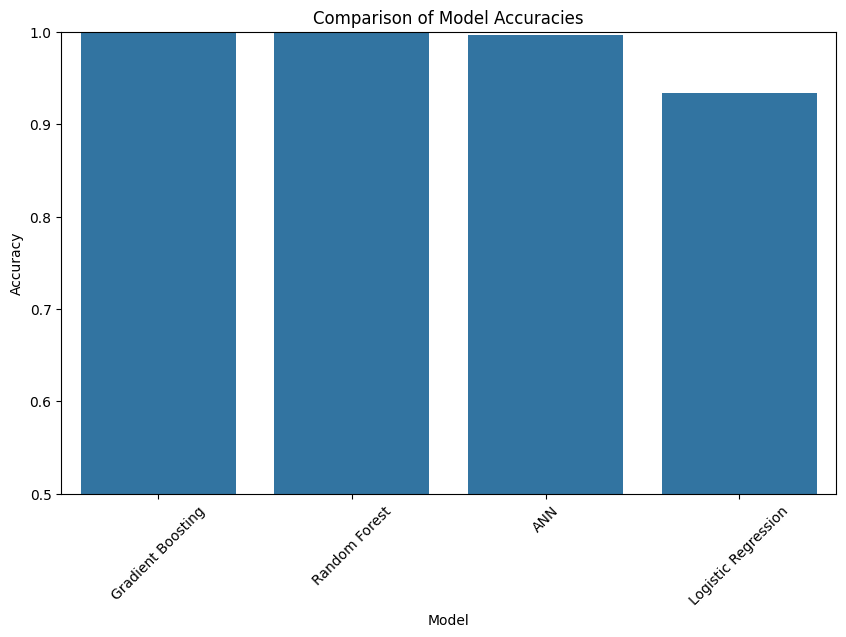

In [ ]:
accuracies = {
    'Gradient Boosting': accuracy_gbm,
    'Random Forest': accuracy_rf,
    'ANN': accuracy_ann,
    'Logistic Regression': accuracy_log_reg
}
# 데이터를 시각화하기 좋게 DataFrame으로 변환
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# 바 차트 생성
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Comparison of Model Accuracies')
plt.ylim(0.5, 1)  # Y축의 범위를 조정하여 차트의 차이를 더 잘 보이게 할 수 있습니다.
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)  # 모델 이름이 긴 경우 기울기 조정
plt.show()


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Gradient Boosting    0.998950   1.000000  0.998015  0.999007  0.999008
Random Forest        0.998530   0.998809  0.998412  0.998610  0.998537
ANN                  0.996850   0.998805  0.995236  0.997017  0.996949
Logistic Regression  0.933431   1.000000  0.874156  0.932853  0.937078


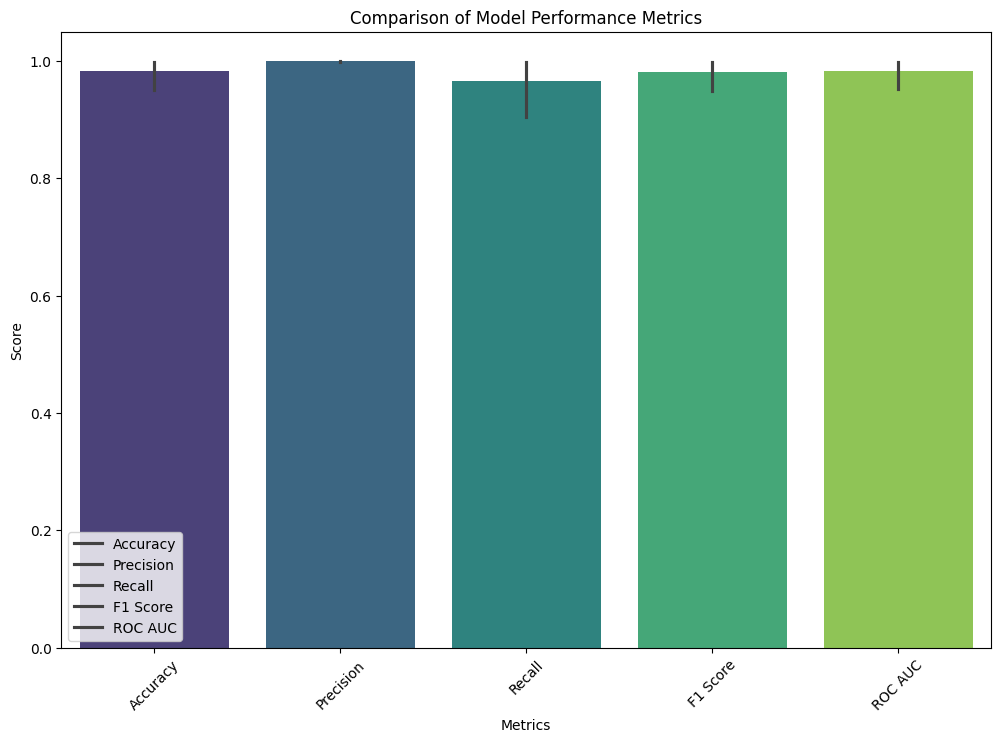

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 각 모델의 예측 결과
y_preds = {
    'Gradient Boosting': y_pred_gbm,
    'Random Forest': y_pred_rf,
    'ANN': y_pred_ann,
    'Logistic Regression': y_pred_lr
}

# 비교할 성능 지표를 계산할 함수
def calculate_performance_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# 성능 지표 계산
performance_metrics = {}
for model_name, y_pred in y_preds.items():
    accuracy, precision, recall, f1, roc_auc = calculate_performance_metrics(y_test, y_pred)
    performance_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# 결과 출력
performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# 결과 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(performance_df.columns)
plt.show()


#표본 입력 예시

In [ ]:
# 100번째 행을 선택합니다.
row_100 = df.iloc[99]  # 인덱스는 0부터 시작하므로 99는 100번째 행을 의미합니다.

# 선택된 행을 출력합니다.
print("100번째 행의 값들:")
print(row_100)


100번째 행의 값들:
SMOK_QTY                      25.000000
SMOK_STRT_AGE                 98.000000
SMOK_DTRN_YCNT                 1.000000
HORM_TRTM_YN                   1.000000
HORM_TRTM_DTRN_DCNT           50.000000
HORM_TRTM_PRPS_CD              6.000000
MENO_YN                        1.000000
MENO_AGE                       8.000000
UCLN_PRGN_YN                   1.000000
MENA_AGE                      12.000000
SHIS_YN                        1.000000
UCLN_OPN_ETC_SITE_CRCN_YN      1.000000
CUR_SMOK_YN                    1.000000
RDT_DTRN_YN                    1.000000
FDLV_AGE                      97.000000
HORM_TRTM_INGR_NM              3.000000
MHIS_BRST_OPRT_YN              1.000000
HRT_USE_YN                     1.000000
HRT_DTRN_MCNT                  6.000000
target                         1.000000
Risk_Percentile_lr            72.660765
Risk_Percentile_rf           100.000000
Risk_Percentile_ann          100.000000
Risk_Percentile_gbm           99.992235
Name: 99, dtype: float64


In [ ]:
# 18346번째 행을 선택합니다.
row_18346 = df.iloc[18345]  # 인덱스는 0부터 시작하므로 99는 100번째 행을 의미합니다.

# 선택된 행을 출력합니다.
print("18346번째 행의 값들:")
print(row_18346)


18346번째 행의 값들:
SMOK_QTY                      0.000000
SMOK_STRT_AGE                 0.000000
SMOK_DTRN_YCNT                0.000000
HORM_TRTM_YN                  0.000000
HORM_TRTM_DTRN_DCNT           0.000000
HORM_TRTM_PRPS_CD             0.000000
MENO_YN                       0.000000
MENO_AGE                      0.000000
UCLN_PRGN_YN                  0.000000
MENA_AGE                     13.100000
SHIS_YN                       0.000000
UCLN_OPN_ETC_SITE_CRCN_YN     0.000000
CUR_SMOK_YN                   0.000000
RDT_DTRN_YN                   0.500000
FDLV_AGE                      0.000000
HORM_TRTM_INGR_NM             0.000000
MHIS_BRST_OPRT_YN             0.500000
HRT_USE_YN                    1.000000
HRT_DTRN_MCNT                 1.000000
target                        0.000000
Risk_Percentile_lr           -2.556514
Risk_Percentile_rf            0.000000
Risk_Percentile_ann           0.001334
Risk_Percentile_gbm           0.045454
Name: 18345, dtype: float64


In [ ]:
import pandas as pd


# 100번째 행을 선택합니다.
row_100 = df.iloc[[99]]
# 'DIAG_YN', 'Risk_score', 'Risk_Percentile'을 제외한 열을 사용하여 예측을 수행합니다.
input_data = row_100.drop(['Risk_Percentile_lr','Risk_Percentile_rf',
                           'Risk_Percentile_ann','Risk_Percentile_gbm'], axis=1)
new_predictions = gb_model.predict(input_data)

# 입력 데이터와 예측 결과를 함께 출력합니다.
print("입력 데이터:")
print(input_data)

# 예측 결과를 출력합니다.
print("새로운 데이터셋에 대한 예측 결과:", new_predictions)


입력 데이터:
    SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
99      25.0           98.0             1.0           1.0   

    HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  UCLN_PRGN_YN  \
99                 50.0                6.0      1.0       8.0           1.0   

    MENA_AGE  SHIS_YN  UCLN_OPN_ETC_SITE_CRCN_YN  CUR_SMOK_YN  RDT_DTRN_YN  \
99      12.0      1.0                        1.0          1.0          1.0   

    FDLV_AGE  HORM_TRTM_INGR_NM  MHIS_BRST_OPRT_YN  HRT_USE_YN  HRT_DTRN_MCNT  \
99      97.0                3.0                1.0         1.0            6.0   

    target  
99     1.0  
새로운 데이터셋에 대한 예측 결과: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd


# 100번째 행을 선택합니다.
row_18346 = df.iloc[[18345]]
# 'DIAG_YN', 'Risk_score', 'Risk_Percentile'을 제외한 열을 사용하여 예측을 수행합니다.
input_data2 = row_18346.drop(['Risk_Percentile_lr','Risk_Percentile_rf',
                           'Risk_Percentile_ann','Risk_Percentile_gbm'], axis=1)
new_predictions2 = gb_model.predict(input_data)

# 입력 데이터와 예측 결과를 함께 출력합니다.
print("입력 데이터:")
print(input_data2)

# 예측 결과를 출력합니다.
print("새로운 데이터셋에 대한 예측 결과:", new_predictions2)


입력 데이터:
       SMOK_QTY  SMOK_STRT_AGE  SMOK_DTRN_YCNT  HORM_TRTM_YN  \
18345       0.0            0.0             0.0           0.0   

       HORM_TRTM_DTRN_DCNT  HORM_TRTM_PRPS_CD  MENO_YN  MENO_AGE  \
18345                  0.0                0.0      0.0       0.0   

       UCLN_PRGN_YN  MENA_AGE  SHIS_YN  UCLN_OPN_ETC_SITE_CRCN_YN  \
18345           0.0      13.1      0.0                        0.0   

       CUR_SMOK_YN  RDT_DTRN_YN  FDLV_AGE  HORM_TRTM_INGR_NM  \
18345          0.0          0.5       0.0                0.0   

       MHIS_BRST_OPRT_YN  HRT_USE_YN  HRT_DTRN_MCNT  target  
18345                0.5         1.0            1.0     0.0  
새로운 데이터셋에 대한 예측 결과: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


#점수 분포도

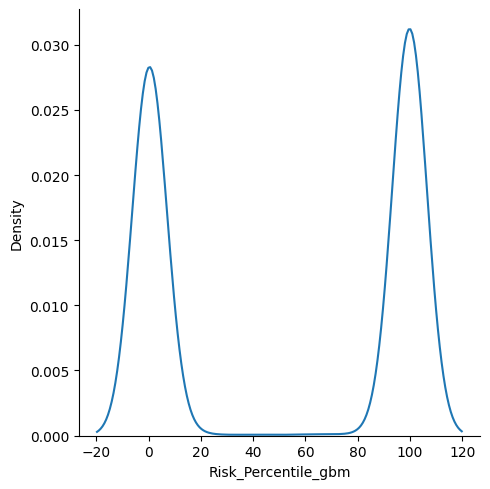

In [ ]:
import seaborn as sns

sns.displot(data=df, x='Risk_Percentile_gbm', kind='kde')


<ipython-input-53-2b746fc5fd04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Risk_Percentile_gbm'], kde=True, rug=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing fro

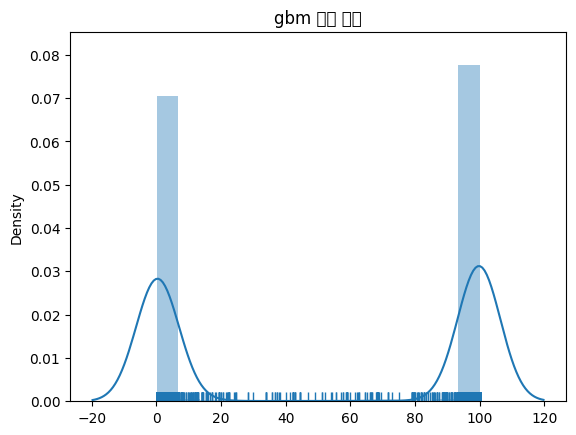

In [ ]:
sns.distplot(x=df['Risk_Percentile_gbm'], kde=True, rug=True)
plt.title("gbm 점수 분포")
plt.show()

##점수 정확도 분석

<ipython-input-59-3b43b4e57bfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Risk_Percentile_ann'], kde=True, rug=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing fro

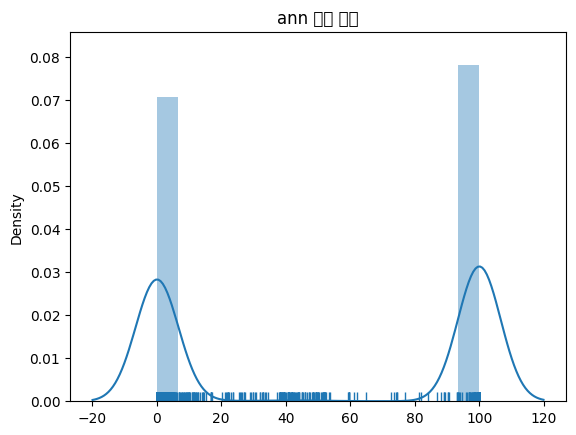

In [ ]:
sns.distplot(x=df['Risk_Percentile_ann'], kde=True, rug=True)
plt.title("ann 점수 분포")
plt.show()

<ipython-input-60-e960e20dfd8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Risk_Percentile_rf'], kde=True, rug=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from

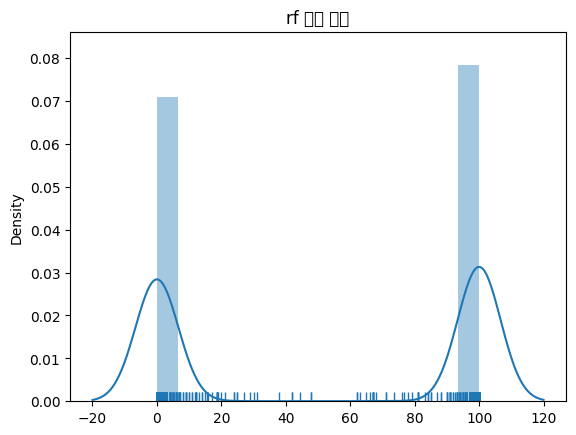

In [ ]:
sns.distplot(x=df['Risk_Percentile_rf'], kde=True, rug=True)
plt.title("rf 점수 분포")
plt.show()

<ipython-input-61-ad8729ee3e73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Risk_Percentile_lr'], kde=True, rug=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from

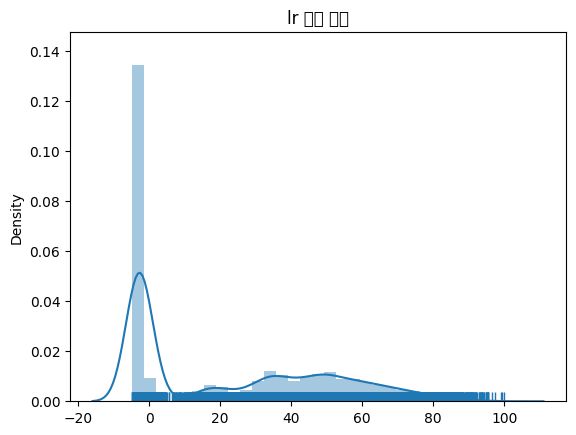

In [ ]:
sns.distplot(x=df['Risk_Percentile_lr'], kde=True, rug=True)
plt.title("lr 점수 분포")
plt.show()

In [ ]:
# 'Risk_Percentile_gbm' 칼럼의 값과 'target' 칼럼의 값을 가져옴
risk_percentile = df['Risk_Percentile_gbm']
target = df['target']


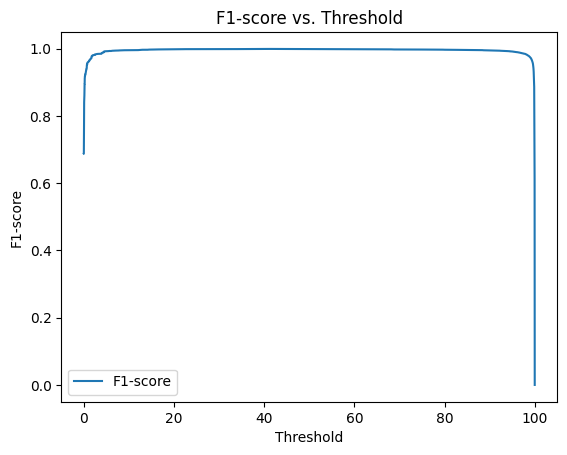

Best Threshold: 40.13314220343852
Best F1-score: 0.9992389345083117
Corresponding Precision: 0.9990388466159391
Corresponding Recall: 0.9994391025641025


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# 정밀도, 재현율, 임계값 계산
precision, recall, thresholds = precision_recall_curve(target, risk_percentile)

# F1-score 계산
f1_scores = [f1_score(target, (risk_percentile >= threshold).astype(int)) for threshold in thresholds]

# F1-score와 thresholds 간 관계 시각화
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.show()

# 최적의 임계값 선택
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

print("Best Threshold:", best_threshold)
print("Best F1-score:", best_f1_score)
print("Corresponding Precision:", best_precision)
print("Corresponding Recall:", best_recall)

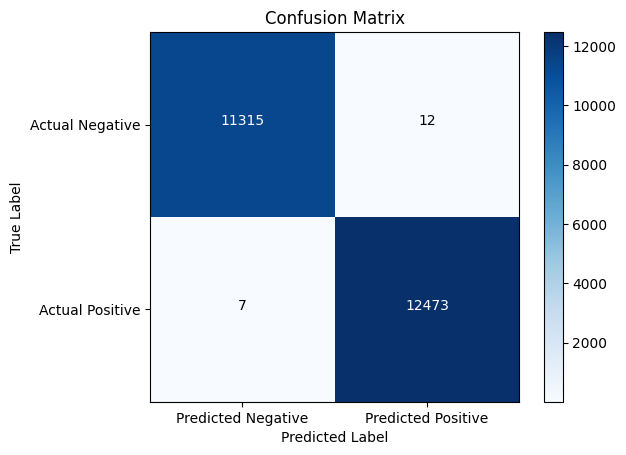

In [ ]:
# 주어진 임계값
threshold = 40.13314220343852

# 임계값을 기준으로 이진 분류 수행
predicted = (risk_percentile >= threshold).astype(int)

# 혼동 행렬 계산
tn, fp, fn, tp = confusion_matrix(target, predicted).ravel()

# 혼동 행렬 시각화
conf_matrix = np.array([[tn, fp], [fn, tp]])
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > (conf_matrix.max() / 2) else 'black')

plt.show()

In [ ]:
# 재현율과 정밀도 계산
recall = recall_score(target, predicted)
precision = precision_score(target, predicted)

print("Recall:", recall)
print("Precision:", precision)

Recall: 0.9994391025641025
Precision: 0.9990388466159391


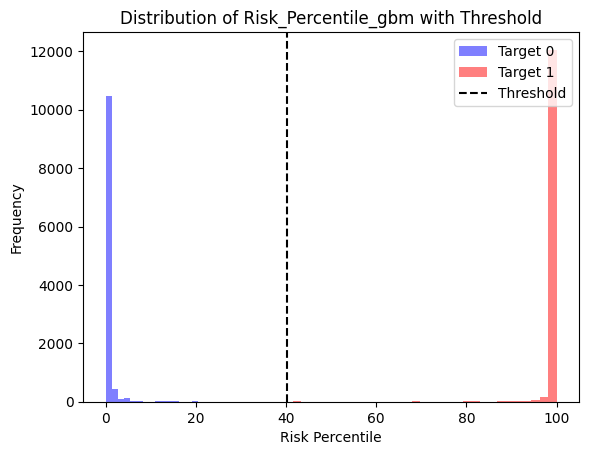

In [ ]:
# 'target'이 0인 표본과 1인 표본을 나누기
target_0 = df[df['target'] == 0]['Risk_Percentile_gbm']
target_1 = df[df['target'] == 1]['Risk_Percentile_gbm']

# 히스토그램을 통해 시각화
plt.hist(target_0, bins=50, color='blue', alpha=0.5, label='Target 0')
plt.hist(target_1, bins=50, color='red', alpha=0.5, label='Target 1')
plt.axvline(x=threshold, color='black', linestyle='--', label='Threshold')
plt.xlabel('Risk Percentile')
plt.ylabel('Frequency')
plt.title('Distribution of Risk_Percentile_gbm with Threshold')
plt.legend()
plt.show()